In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
api_username = 'cuteanimalzzzz123'

In [75]:
user_table_filename = 'saved_info/%s_collected_user_info_table.csv'%api_username
if os.path.isfile(user_table_filename):
    loaded_user_table = pd.read_csv(user_table_filename)
    loaded_user_table.set_index('user_id', inplace=True)
else:
    loaded_user_table = None

In [76]:
loaded_user_table

,username,private_status,follower_count,following_count,media_count,full_name,profile_pic_url,bio_text,url_in_bio,hashtag_following_count,usertags_count,api_request_time
user_id,,,,,,,,,,,,
572555874,v.d.f._,False,885,1855,7,NaN,https://scontent-lax3-1.cdninstagram.com/v/t51...,NaN,NaN,0,32,1.640194e+09
589563133,kiwi_frucht,False,403,1786,0,NaN,https://instagram.fkhh1-1.fna.fbcdn.net/v/t51....,NaN,NaN,0,1,1.640194e+09
1180184021,atena_kbr,False,411,778,1,atena,https://scontent-lax3-2.cdninstagram.com/v/t51...,NaN,NaN,0,1,1.640194e+09
747482042,krisitomasevic,False,30,67,24,Kristian Tomasevic,https://scontent-lax3-1.cdninstagram.com/v/t51...,-14 \n-FB: Krisi Tomasevic\n-Hrvat i Bosanac <...,NaN,0,0,1.640194e+09
1539736600,johnny_in_love,False,18,71,6,NaN,https://scontent-lax3-2.cdninstagram.com/v/t51...,12\nvergeben\nj+s forever,NaN,0,0,1.640194e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
4120079014,jamieroberts6222,True,568,1943,87,Jamie Roberts,https://scontent-lax3-1.cdninstagram.com/v/t51...,Senior RHS class of 2022.,NaN,1,0,1.639391e+09
39612202963,carconnell_,False,419,582,0,Carley Elizabeth,https://scontent-lax3-2.cdninstagram.com/v/t51...,NaN,NaN,0,1,1.639391e+09
48740245931,jameshatesjameson,True,265,1578,26,James,https://scontent-lax3-2.cdninstagram.com/v/t51...,"spam, love following people.",NaN,0,0,1.639391e+09


In [77]:
def get_average_follower_count(user_table):
    average_follower_count = user_table['follower_count'].mean()
    return average_follower_count

get_average_follower_count(loaded_user_table)

607.1747430249633

In [78]:
def get_average_following_count(user_table):
    average_following_count = user_table['following_count'].mean()
    return average_following_count

get_average_following_count(loaded_user_table)

1093.5198237885463

In [79]:
def get_follow_ratio(user_table):
    follow_ratio = user_table['following_count'].divide(loaded_user_table['follower_count']+1)
    follow_ratio_mean = follow_ratio.mean()
    return follow_ratio_mean

get_follow_ratio(loaded_user_table)

9.903812020826408

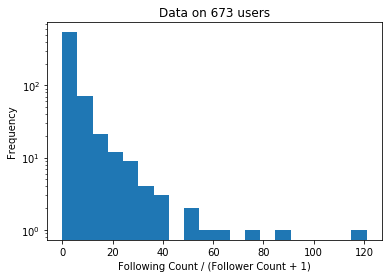

In [92]:
def get_follow_ratio_hist(user_table):
    follow_ratio = user_table['following_count'].divide(user_table['follower_count']+1)
    std_dev = follow_ratio.std()
    mean = follow_ratio.mean()
    outlier_limit = mean + 2*std_dev
    follow_ratio = follow_ratio[follow_ratio < outlier_limit]
    ax = follow_ratio.plot.hist(bins=20)
    ax.set_yscale('log')
    ax.set_title('Data on %d users'%len(follow_ratio))
    ax.set_xlabel('Following Count / (Follower Count + 1)')
    plt.show()
    
get_follow_ratio_hist(loaded_user_table)

In [93]:
def get_sorted_follow_ratio_names(user_table):
    user_table = user_table.set_index('username')
    follow_ratio_column = user_table['following_count'].divide(user_table['follower_count']+1)
    sorted_follow_ratio = follow_ratio_column.sort_values(ascending=False)
    return sorted_follow_ratio
    
get_max_follow_ratio_names(loaded_user_table)

username
sensorytheory      1250.000000
quinomii            834.000000
panggyanin          327.000000
k1tt3nb4byy         220.000000
senija_3383         206.000000
                      ...     
thevenicewhaler       0.153477
santehmsk777          0.139892
_.alice.__            0.123077
alisaaa.rgb           0.110306
kiri.li               0.003411
Length: 681, dtype: float64